<a href="https://colab.research.google.com/github/shleshapatil2212/Spoiled-Leaf-Classification/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the extracted dataset
base_dir = '/content/New_dataset_extract.zip'

# Set up ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for new pixels
)

# Create train generator from the dataset
train_generator = train_datagen.flow_from_directory(
    base_dir,  # Path to the dataset
    target_size=(224, 224),  # MobileNetV2 expects 224x224 images
    batch_size=32,  # Adjust based on your system's memory
    class_mode='binary',  # You have good and bad leaves (binary classification)
    subset='training',  # Set up the training data subset
    shuffle=True
)

Found 8000 images belonging to 1 classes.


In [ ]:
# Load the MobileNetV2 model with ImageNet weights
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',  # Load pre-trained weights
    input_shape=(224, 224, 3),  # Input shape for MobileNetV2
    include_top=False  # Exclude the final fully connected layer
)

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Create a new model on top of MobileNetV2
model = tf.keras.Sequential([
    base_model,  # Add the pre-trained base model
    tf.keras.layers.GlobalAveragePooling2D(),  # Pool the features
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (good or bad)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

model.summary()  # Display model architecture


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can adjust the number of epochs as needed
    verbose=2
)


Epoch 1/10
250/250 - 434s - loss: 0.0133 - accuracy: 0.9951 - 434s/epoch - 2s/step
Epoch 2/10
250/250 - 422s - loss: 3.2184e-04 - accuracy: 1.0000 - 422s/epoch - 2s/step
Epoch 3/10
250/250 - 424s - loss: 1.6311e-04 - accuracy: 1.0000 - 424s/epoch - 2s/step
Epoch 4/10


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

In [ ]:
from zipfile import ZipFile

# Specify the path to your ZIP file
zip_file_path = "/content/New_dataset.zip"
extract_path = "/content/New_dataset_extract.zip"  # Destination folder for extracted files

# Extract the ZIP file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/New_dataset_extract.zip


In [ ]:
# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear images
    zoom_range=0.2,  # Zoom images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # How to fill pixels after transformations
)

In [ ]:
# For Validation Set: No augmentation, only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

# Path to your dataset directories
train_dir = '/content/New_dataset_extract.zip/New_dataset/train'
validation_dir = '/content/New_dataset_extract.zip/New_dataset/test'

In [ ]:
# Flow images from directory for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Flow images from directory for validation
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 9 classes.


In [ ]:
# Load Pretrained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',  # Load pre-trained weights from ImageNet
    input_shape=(224, 224, 3),  # Input size expected by MobileNetV2
    include_top=False  # Exclude the final fully connected layers
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the layers of MobileNetV2 (only train the top layer)
base_model.trainable = False


In [ ]:
# Create the model
model = tf.keras.Sequential([
    base_model,  # Add the base model (MobileNetV2)
    tf.keras.layers.GlobalAveragePooling2D(),  # Pool the features into a fixed-size vector
    tf.keras.layers.Dropout(0.5),  # Dropout to prevent overfitting (50% chance)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output (good/bad leaf)
])


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Adam optimizer for better convergence
    loss='binary_crossentropy',  # Binary crossentropy for binary classification
    metrics=['accuracy']  # Track accuracy during training
)


In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

In [ ]:
'''class_weights = dict(enumerate(class_weights))
class_weights = {i: weight for i, weight in enumerate(class_weights)}
'''

NameError: name 'class_weights' is not defined

In [ ]:
# Early Stopping to stop training if validation loss is not improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Stop after 3 epochs without improvement
    restore_best_weights=True  # Restore the model with the best weights
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,        # Normalize pixel values to [0, 1]
    rotation_range=30,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Apply shearing
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill strategy for augmented images
)

In [ ]:
train_generator = datagen.flow_from_directory(
    directory=train_dir,         # Replace 'train_dir' with your training directory
    target_size=(224, 224),      # Adjust based on your model's input size
    batch_size=32,               # Batch size
    class_mode='categorical'     # Use 'binary' for binary classification
)

Found 6400 images belonging to 8 classes.


In [ ]:
# Step 5: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust as needed
    class_weight=class_weights  # Ensure this is a dictionary
)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node GatherV2 defined at (most recent call last):
<stack traces unavailable>
indices[1] = 3 is not in [0, 2)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_11467]

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from zipfile import ZipFile

In [ ]:
# Step 1: Unzip the dataset
zip_file_path = '/content/New_dataset_up.zip'  # Replace with your zip file path
extract_path = '/content/New_dataset_up_extract.zip'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")

Dataset extracted to: /content/New_dataset_up_extract.zip


In [ ]:
# Step 2: Data Preparation
# Step 2: Data Preparation
train_dir = '/content/New_dataset_up_extract.zip/New_dataset_up/New_dataset/train'  # Replace with the path to your training dataset folder
test_dir = '/content/New_dataset_up_extract.zip/New_dataset_up/New_dataset/test'

# Set parameters
target_size = (224, 224)  # MobileNetV2 default input size
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Prepare train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 5120 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.layers import Dropout


In [ ]:
# Build the MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Add custom classification layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Ensure the output matches the number of classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Confirm the number of classes
print(f"Number of classes detected: {train_generator.num_classes}")


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_7  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_9 (Dropout)         (None, 1280)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               163968    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                

In [ ]:
# Step 4: Train the Model
# Define callbacks
checkpoint = ModelCheckpoint('mobilenetv2_betel_leaves.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/5
160/160 [==============================] - ETA: 0s - loss: 1.5542 - accuracy: 0.4420

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 1113s 7s/step - loss: 1.5542 - accuracy: 0.4420 - val_loss: 2.4624 - val_accuracy: 0.2969
Epoch 2/5
160/160 [==============================] - 1064s 7s/step - loss: 0.5367 - accuracy: 0.8100 - val_loss: 3.6752 - val_accuracy: 0.3187
Epoch 3/5
160/160 [==============================] - 1062s 7s/step - loss: 0.2730 - accuracy: 0.9033 - val_loss: 4.1750 - val_accuracy: 0.3094
Epoch 4/5
160/160 [==============================] - 1076s 7s/step - loss: 0.2089 - accuracy: 0.9232 - val_loss: 3.9019 - val_accuracy: 0.4187
Epoch 5/5
160/160 [==============================] - 1071s 7s/step - loss: 0.1552 - accuracy: 0.9451 - val_loss: 3.7574 - val_accuracy: 0.4313


In [ ]:
# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


10/10 [==============================] - 15s 2s/step - loss: 3.7251 - accuracy: 0.4313
Validation Loss: 3.7251338958740234
Validation Accuracy: 0.4312500059604645


In [ ]:

# Step 6: Save the Model
model.save("mobilenetv2_betel_leaves_final.h5")
print("Model saved successfully.")


Model saved successfully.


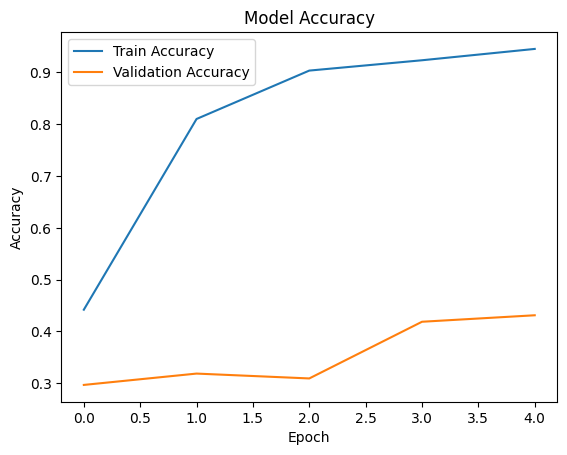

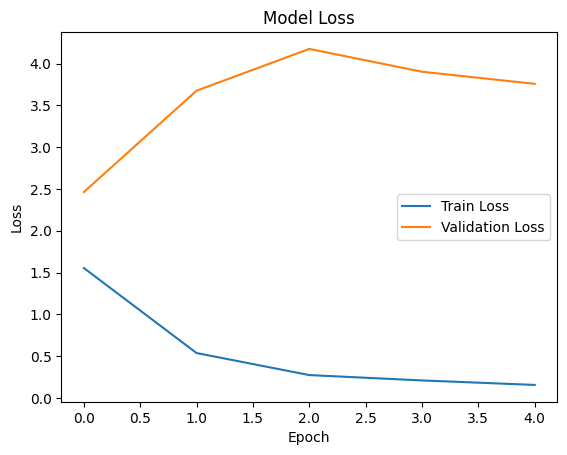

In [ ]:
import matplotlib.pyplot as plt
# Optional: Visualize Training
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [ ]:

# Get predictions from the validation generator
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Generate classification report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Prepare the result table
results = []
for label, metrics in report.items():
    if label in class_labels:
        correctly_classified = metrics['precision'] * metrics['support'] / sum(y_true == class_labels.index(label))
        misclassified = 1 - correctly_classified
        results.append({
            "Leaves Classes": label,
            "Correctly Classified (%)": correctly_classified * 100,
            "Misclassification (%)": misclassified * 100
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv("classification_results_mobilenetv2_transfer_learning.csv", index=False)
print("Results saved to classification_results_mobilenetv2_transfer_learning.csv")

# Display results
print(results_df)

10/10 [==============================] - 17s 2s/step
Results saved to classification_results_mobilenetv2_transfer_learning.csv
     Leaves Classes  Correctly Classified (%)  Misclassification (%)
0     Good_Banarasi                  0.000000             100.000000
1     Good_Calcutta                 12.727273              87.272727
2       Good_Maghai                 11.111111              88.888889
3        Good_Poona                 37.500000              62.500000
4  Spoiled_Banarasi                  8.333333              91.666667
5  Spoiled_Calcutta                  0.000000             100.000000
6    Spoiled_Maghai                 12.444444              87.555556
7     Spoiled_Poona                  0.000000             100.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the number of classes
num_classes = 8  # Update this with the actual number of classes in your dataset

# Load the MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

# Freeze layers for fine-tuning
for layer in base_model.layers[:100]:  # Adjust this range to control which layers to unfreeze
    layer.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Now 'num_classes' is defined
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-5 if epoch < 5 else 1e-6)

# Assuming train_data and test_data are your dataset generators
# Fine-tune the model
fine_tune_epochs = 10
history_fine_tune = model.fit(
    train_dir,  # Replace with your training dataset generator
    validation_data=test_dir,  # Replace with your test dataset generator
    epochs=fine_tune_epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_dir)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")


IndexError: tuple index out of range

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from zipfile import ZipFile

'''# Step 1: Unzip the dataset
zip_file_path = '/content/betel_leaves.zip'  # Replace with your zip file path
extract_path = '/content/betel_leaves'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")'''

# Step 2: Data Preparation
data_dir = extract_path

# Set parameters
target_size = (224, 224)  # MobileNetV2 default input size
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Prepare train and validation generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Step 3: Build the MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers
    layer.trainable = True

# Add custom classification layers with Dropout to prevent overfitting
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Added Dropout layer to reduce overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),  # Another Dropout layer
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for stability
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 4: Train the Model
# Define callbacks
checkpoint = ModelCheckpoint('mobilenetv2_betel_leaves.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[checkpoint, early_stopping]
)

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Step 6: Save the Model
model.save("mobilenetv2_betel_leaves_final.h5")
print("Model saved successfully.")

# Optional: Visualize Training
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Found 6400 images belonging to 1 classes.
Found 1600 images belonging to 1 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               163968    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                    

KeyboardInterrupt: 

In [ ]:
# Adding some custmizable layers
